In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns


**1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:**

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Ответ: a), б), г), д), e) 

**2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.**

In [2]:
DUQ_hourly = pd.read_csv("DUQ_hourly.csv", index_col=[0], parse_dates=[0])
DUQ_hourly.head() 

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [3]:
DUQ_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
DUQ_hourly.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


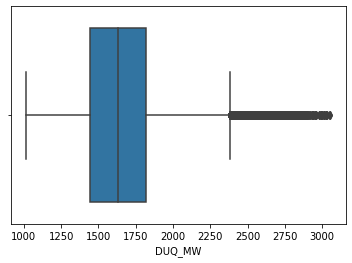

In [5]:
sns.boxplot(DUQ_hourly['DUQ_MW'])

Text(0, 0.5, 'МВт')

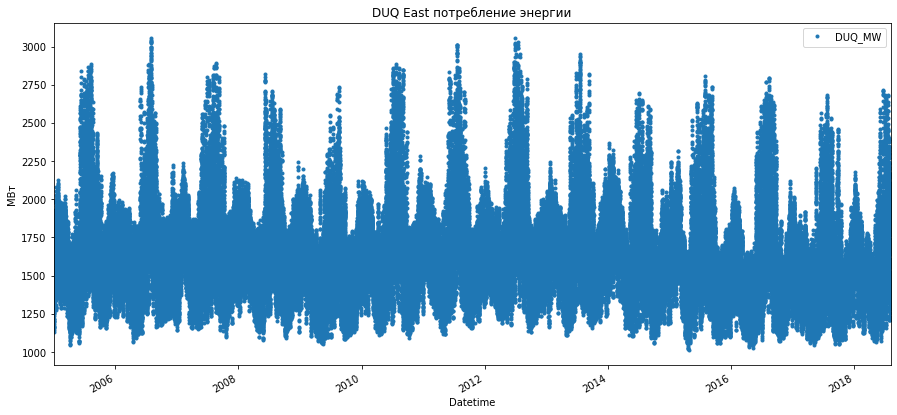

In [6]:
DUQ_hourly.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ East потребление энергии' )
plt.ylabel ( 'МВт' )

Судя по всему выборка уже предобработана, потому что в ней нет пропусков и в данных нет выбросов. Расход энергии распределен с ярковыраженной сезонностью.

**3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.**

In [7]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [44]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 121.7 KB


In [14]:
brent_data.resample("W").mean().head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [15]:
brent_data.resample("M").mean().head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


**4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.**

Text(0.5, 1.0, 'The change in average prices')

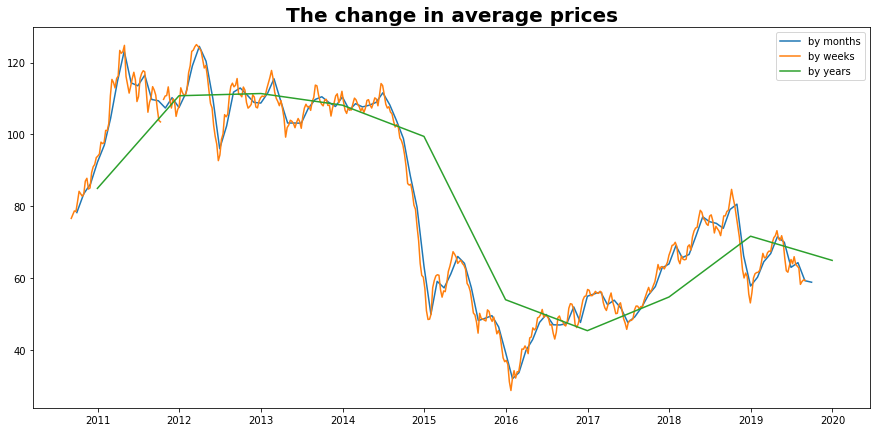

In [36]:
plt.figure(figsize=( 15, 7 ))
plt.plot(brent_data.resample("M").mean(), label='by months')
plt.plot(brent_data.resample("W").mean(), label='by weeks')
plt.plot(brent_data.resample("Y").mean(), label='by years')
plt.legend()
plt.title('The change in average prices', fontweight = "bold", fontsize = 20)

Text(0.5, 1.0, 'The change in the standard deviation')

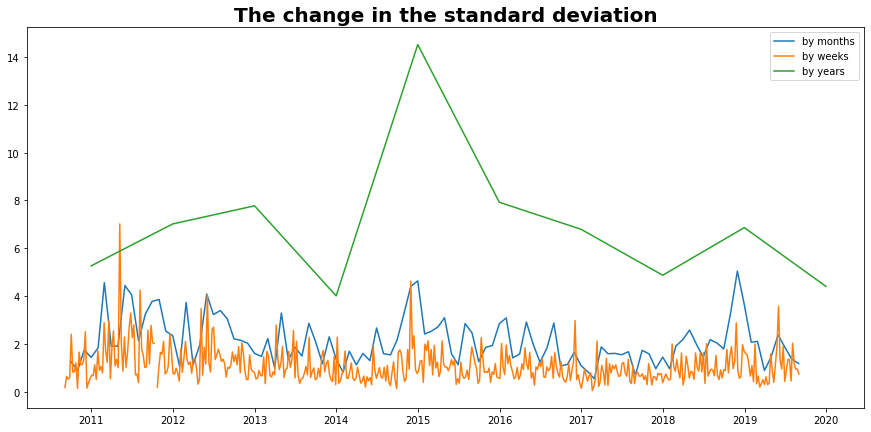

In [35]:
plt.figure(figsize=( 15, 7 ))
plt.plot(brent_data.resample("M").std(), label='by months')
plt.plot(brent_data.resample("W").std(), label='by weeks')
plt.plot(brent_data.resample("Y").std(), label='by years')
plt.legend()
plt.title('The change in the standard deviation', fontweight = "bold", fontsize = 20)

**5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.**

Text(0.5, 1.0, 'The change in average prices')

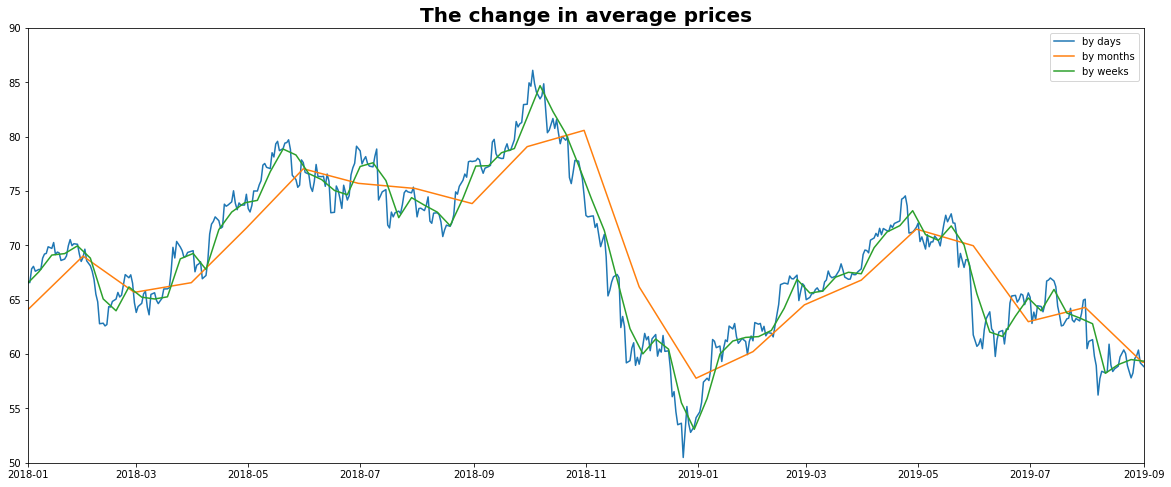

In [76]:
plt.figure(figsize=( 20, 8 ))
plt.plot(brent_data, label='by days')
plt.plot(brent_data.resample("M").mean(), label='by months')
plt.plot(brent_data.resample("W").mean(), label='by weeks')
plt.xlim('2018-01-01','2019-9-01')
plt.ylim(50,90)
plt.legend()
plt.title('The change in average prices', fontweight = "bold", fontsize = 20)

На дневных графиках мы видими большую волатильность курса нефти. А на недельных и тем более месячных мы видим усредненные цифры, которые зачастую очень сильно отличаются от реальных. Например, если бы мы использовали среднемесячные цифры 2018.12 - 2019.01 для обучения модели, то результат был бы не очень хороший, потому что среднемесячная цена отличается на 5$ от дневной почти весь месяц